First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-nu

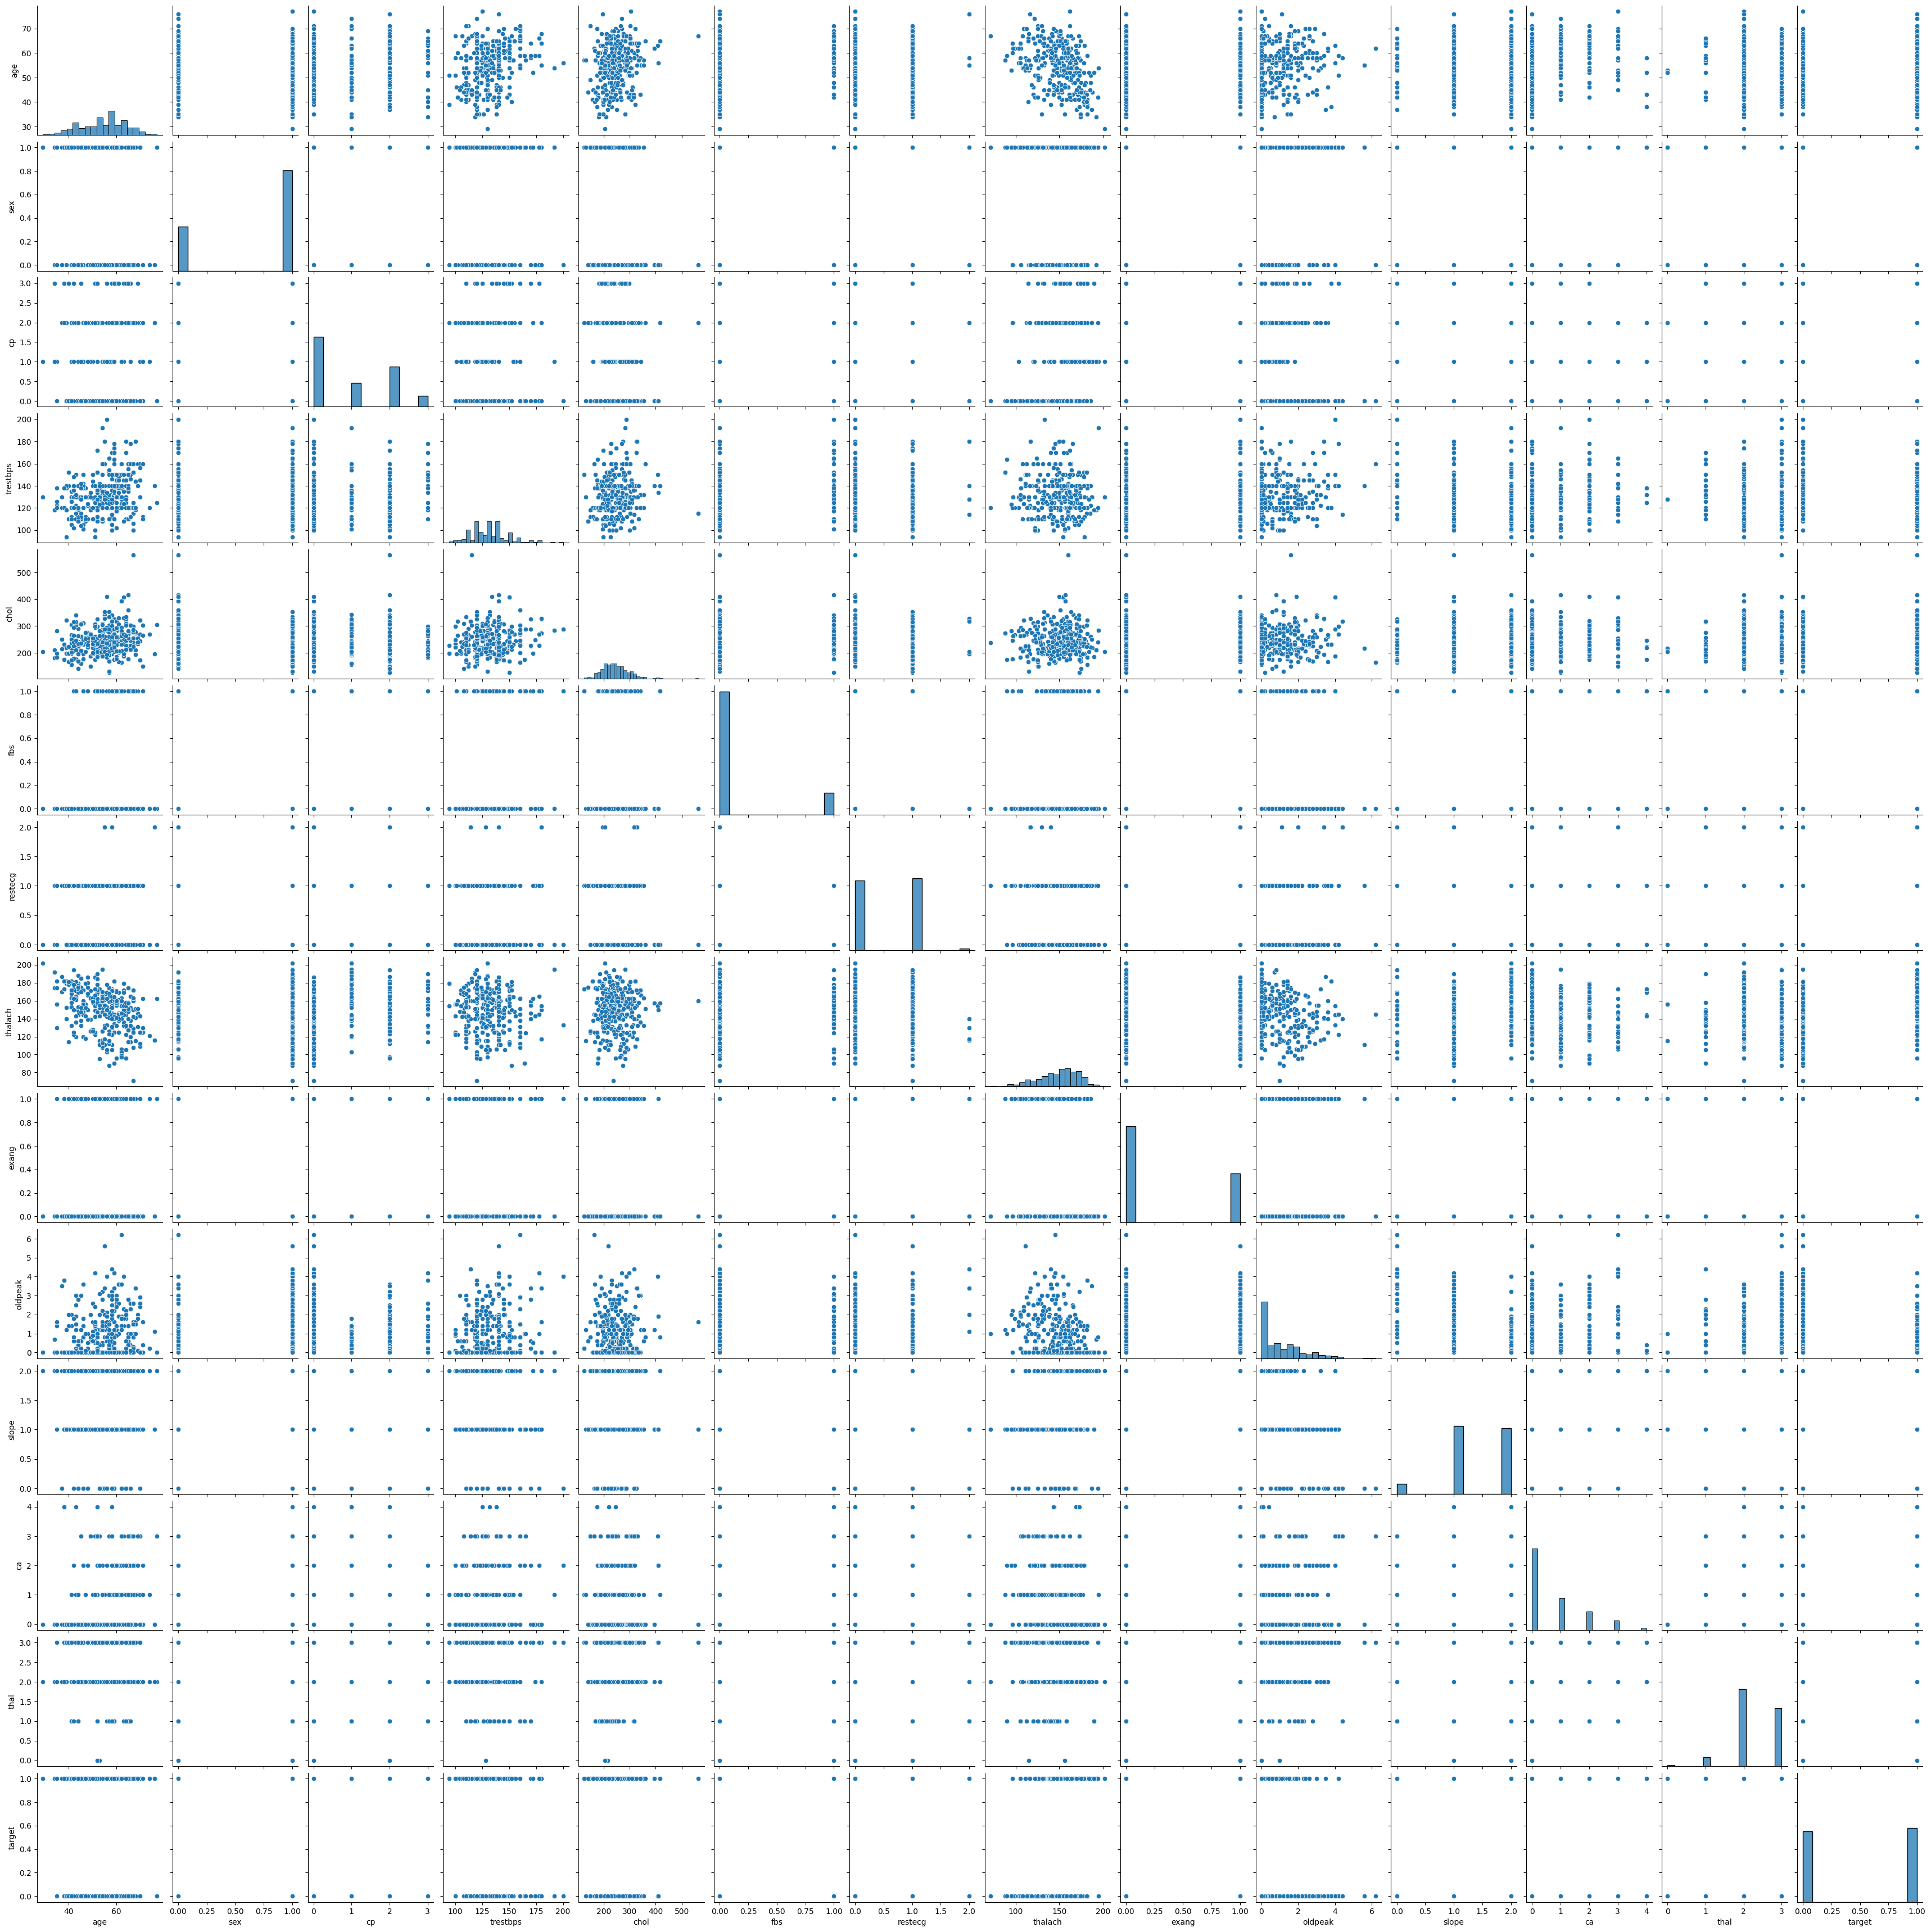

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the specified path
df = pd.read_csv("D:\\Data Science Projects\\HealthcareDataAnalytics\\Dataset\\heart.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get a summary of the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Basic statistical overview
print("\nStatistical Overview:")
print(df.describe())

# Visualize data distributions and relationships
sns.pairplot(df)
plt.show()

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("D:\\Data Science Projects\\HealthcareDataAnalytics\\Dataset\\heart.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get a summary of the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Handle missing values (if any)
df_cleaned = df.dropna()  # Option 1: Drop rows with missing values

print("\nAfter handling missing values:")
print(df_cleaned.isnull().sum())

# Handling Outliers
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nAfter removing outliers:")
print(df_no_outliers.describe())

# Feature Scaling
target_column = 'target'

# Separate features and target
features = df_no_outliers.drop(target_column, axis=1)
target = df_no_outliers[target_column]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with scaled features and target
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled[target_column] = target

print("\nFeature scaling completed.")
print(df_scaled.head())

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-nu

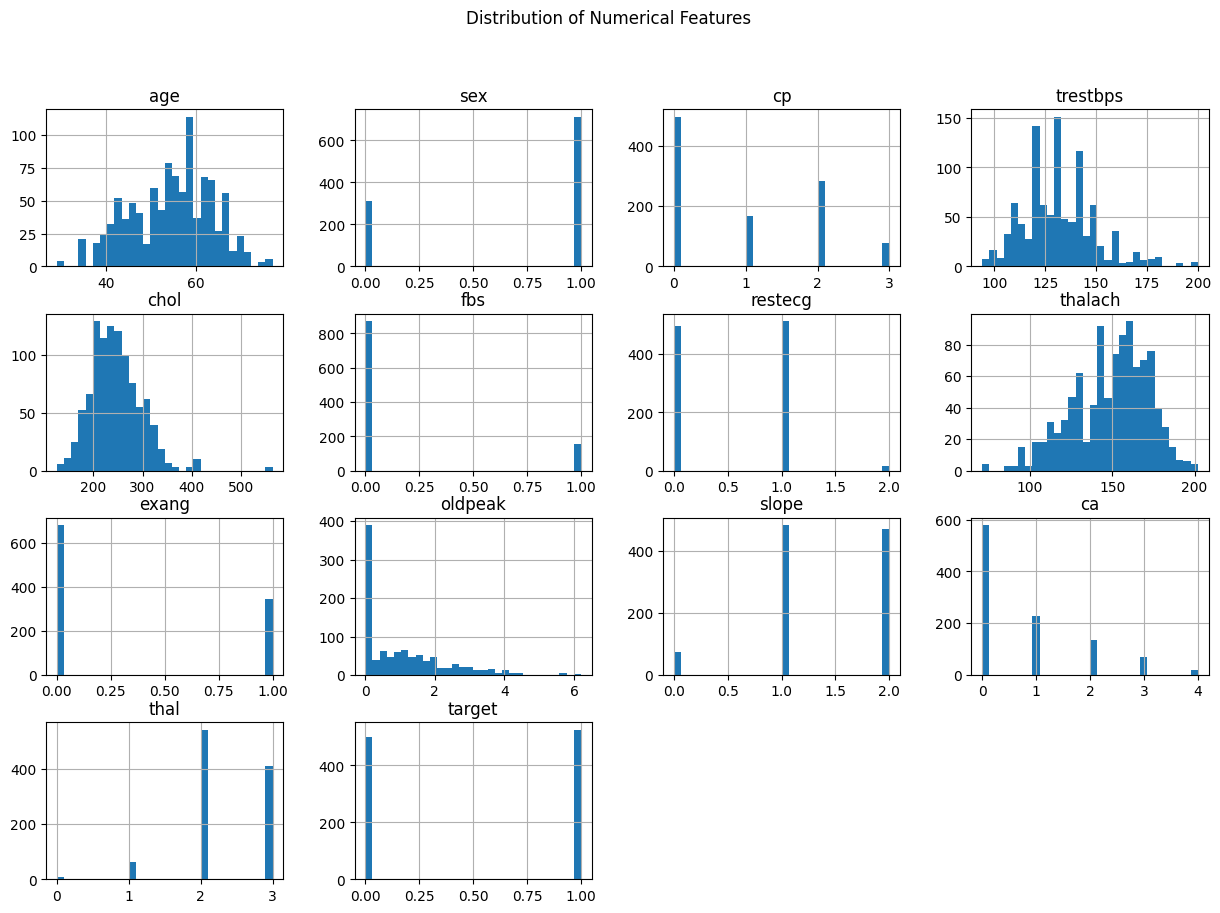

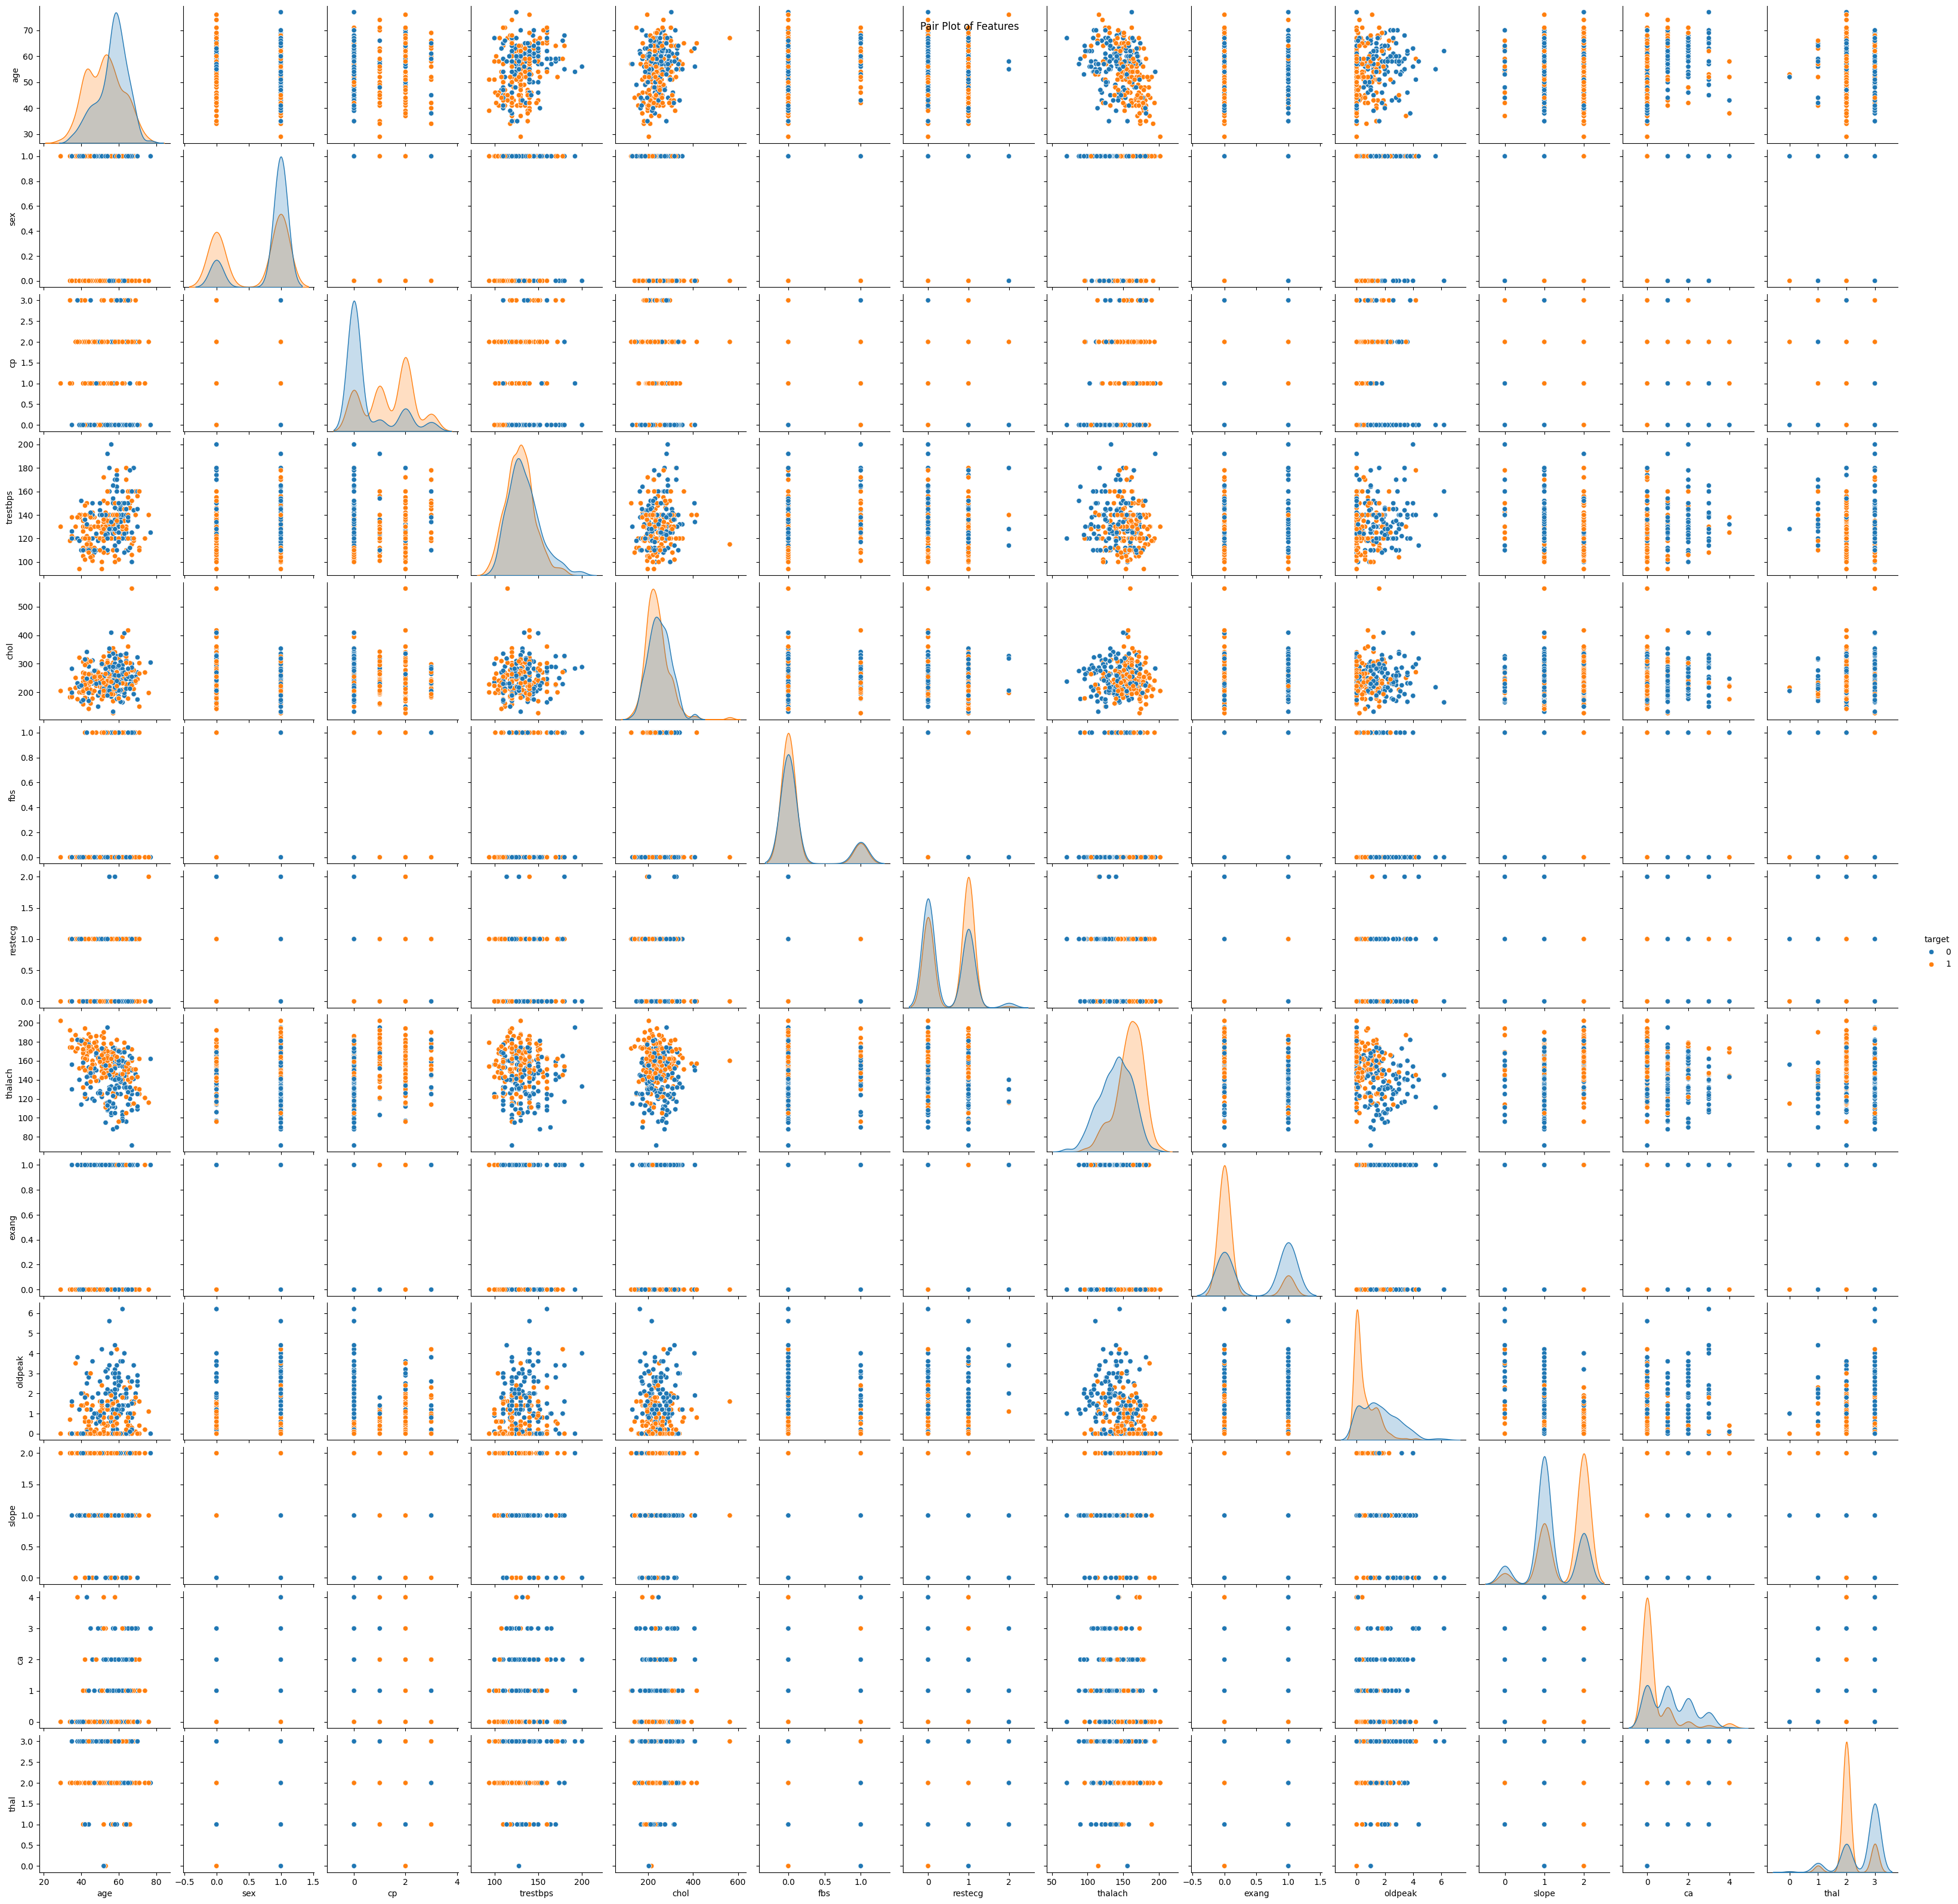

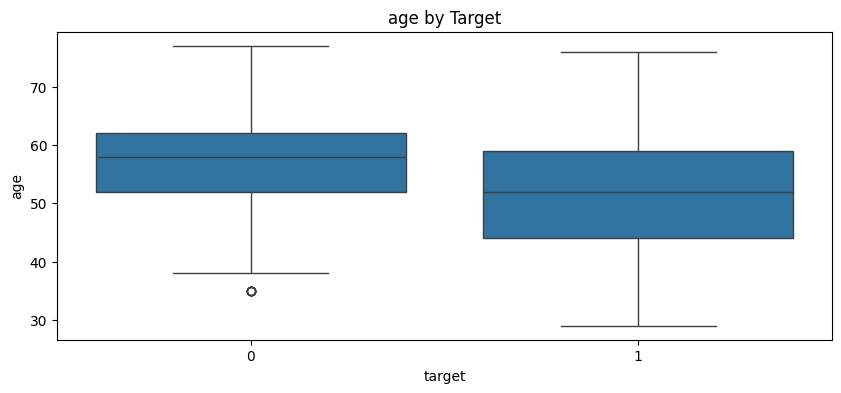

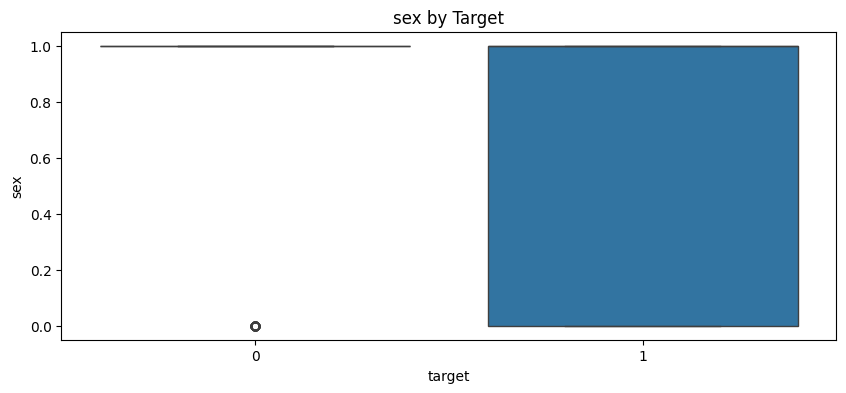

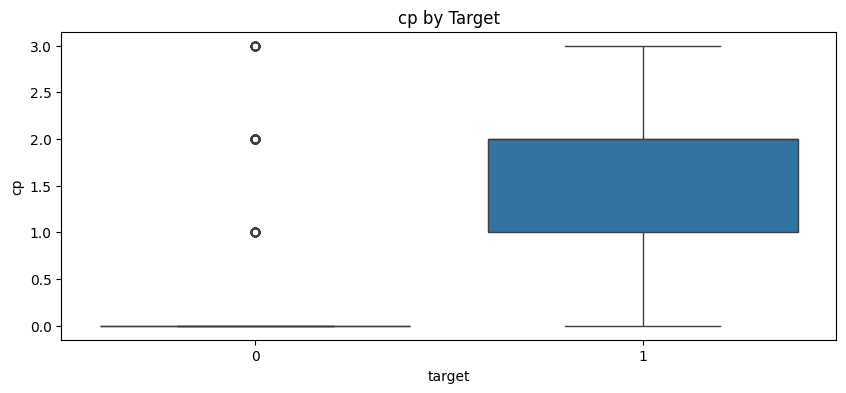

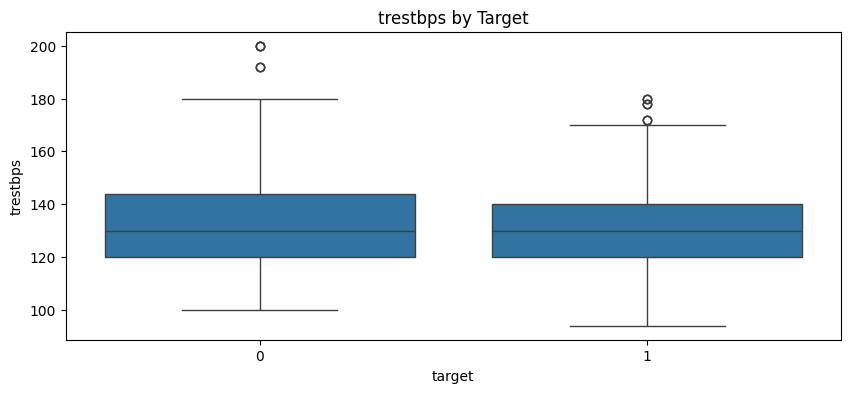

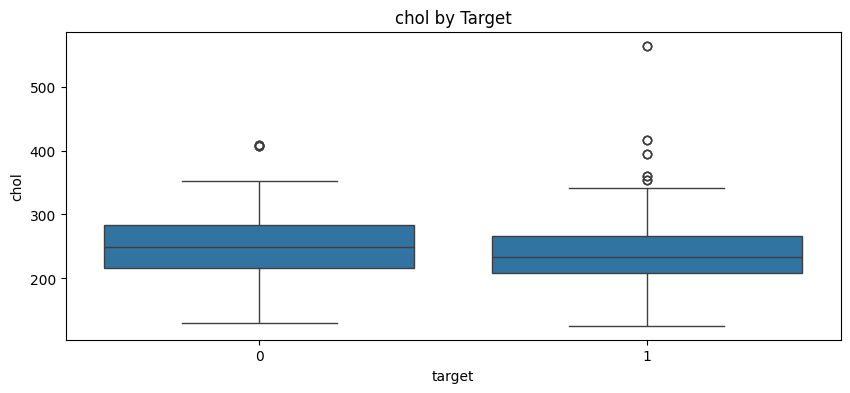

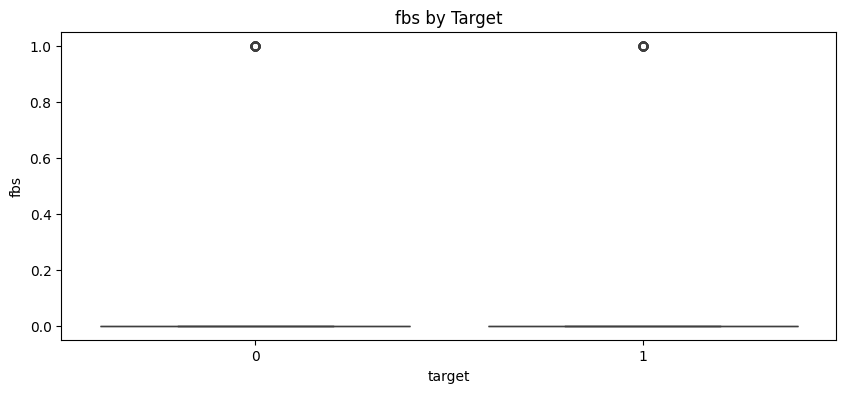

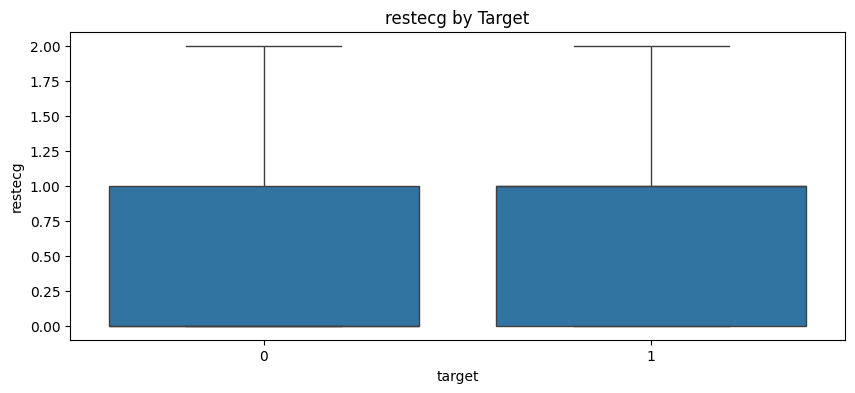

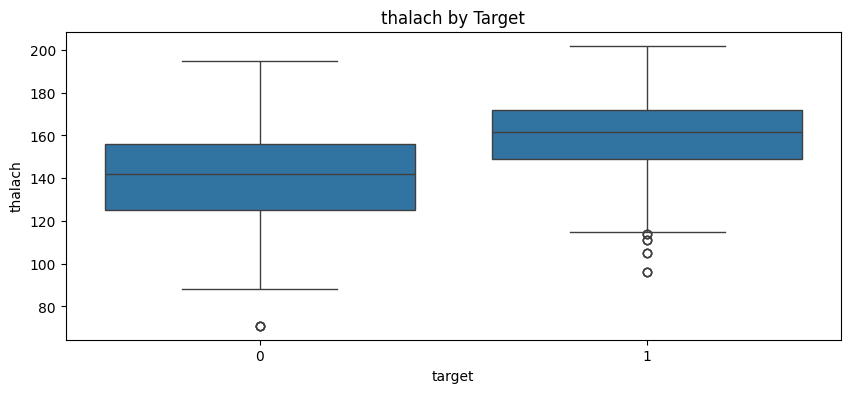

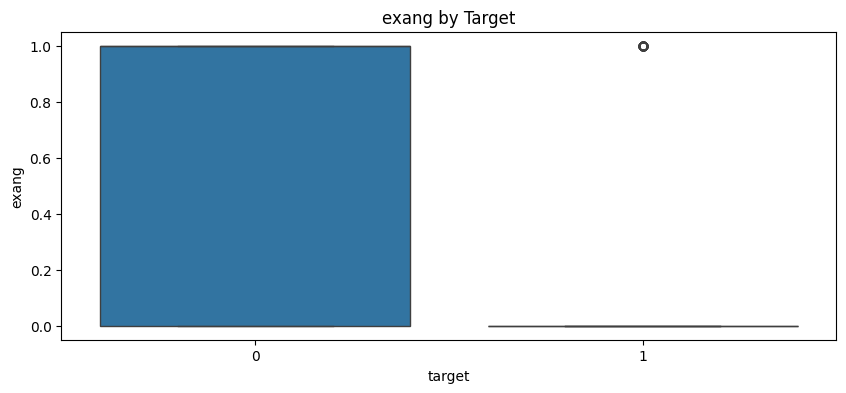

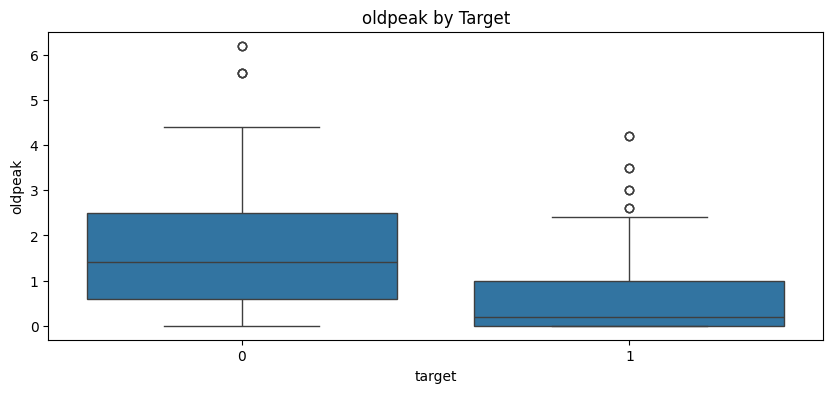

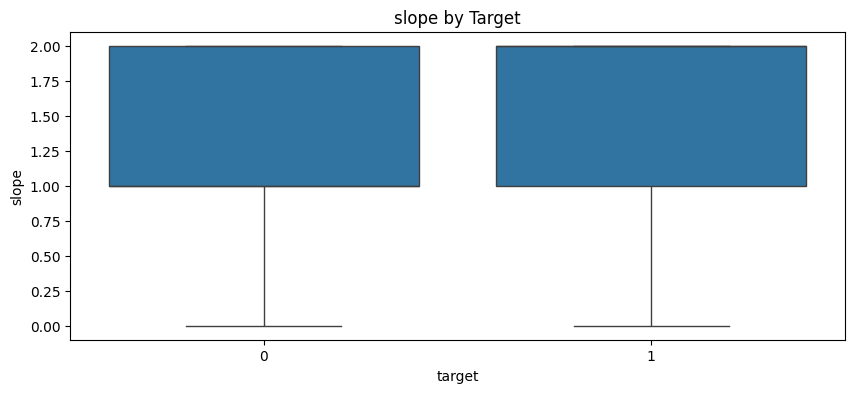

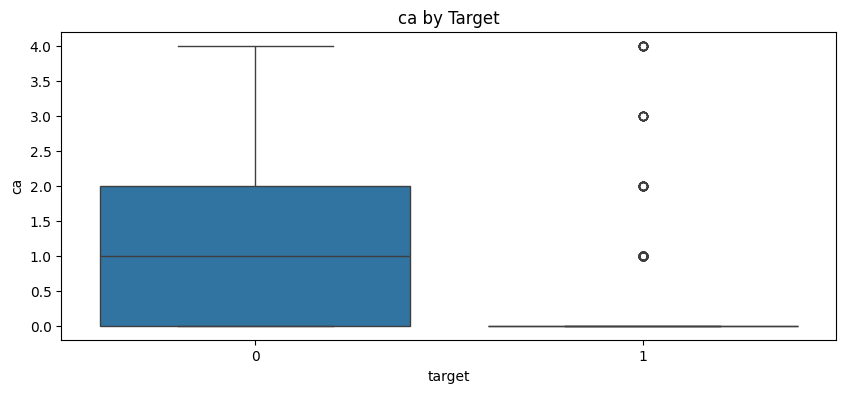

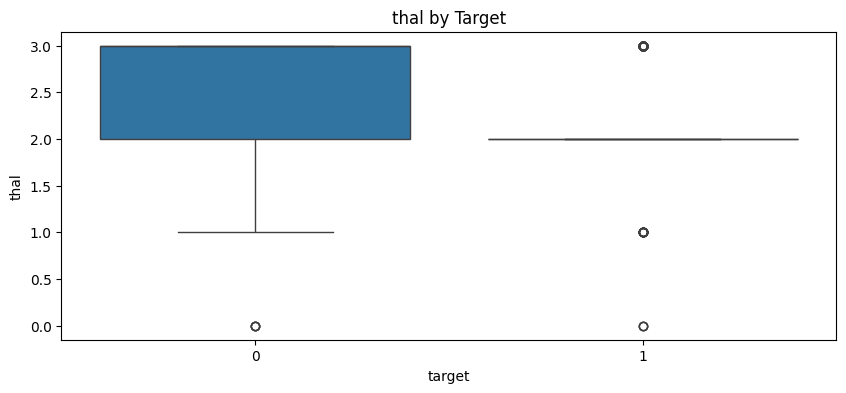

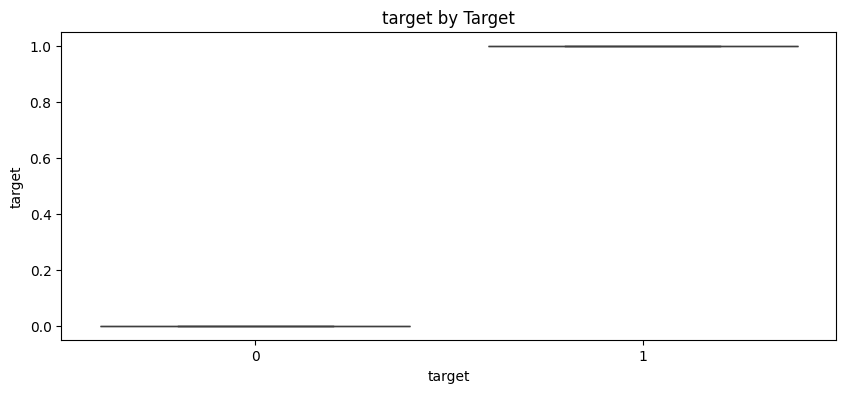

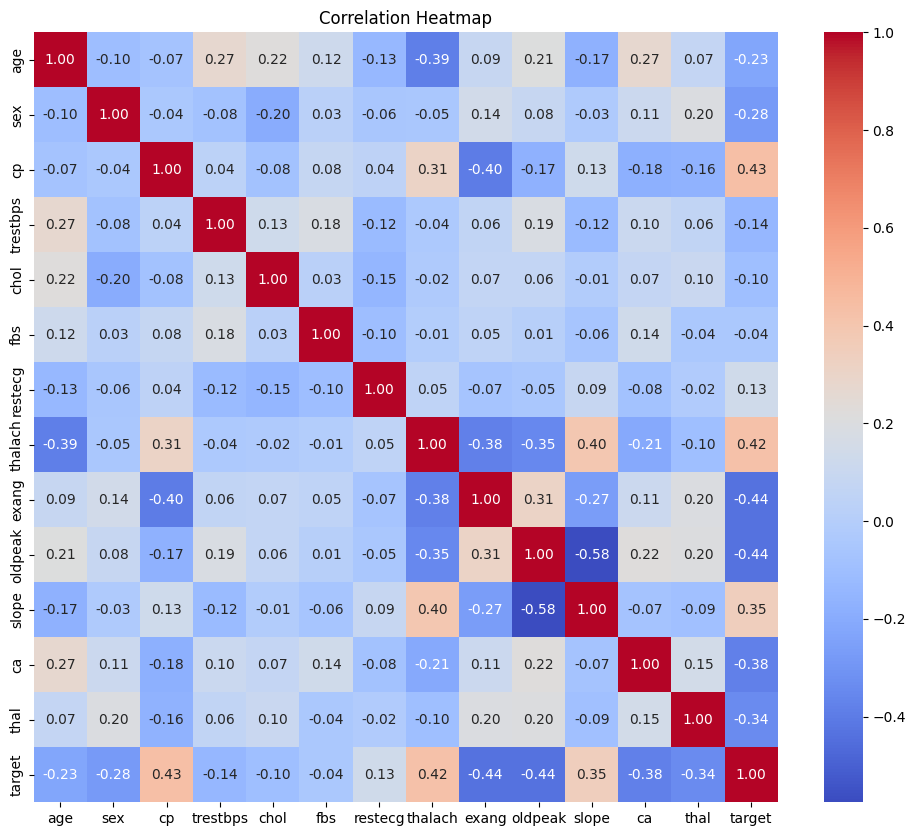

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned and preprocessed dataset
df = pd.read_csv("D:\\Data Science Projects\\HealthcareDataAnalytics\\Dataset\\heart.csv")

# Univariate Analysis
# Distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
df[numerical_features.columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Bar charts for categorical features
categorical_features = df.select_dtypes(include=['object'])
for column in categorical_features.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis
# Scatter plots for pairs of numerical features
sns.pairplot(df, hue='target')
plt.suptitle('Pair Plot of Features')
plt.show()

# Box plots to compare distributions across categories
for column in numerical_features.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='target', y=column, data=df)
    plt.title(f'{column} by Target')
    plt.show()

# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the cleaned and preprocessed dataset
df = pd.read_csv("D:\\Data Science Projects\\HealthcareDataAnalytics\\Dataset\\heart.csv")

# Define target and features
target_column = 'target'  # Replace with your actual target column name
X = df.drop(target_column, axis=1)
y = df[target_column]

# Feature Engineering
# Encode categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  # You can start with RandomForestClassifier
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[102   0]
 [  3 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073

Best Parameters:
{'classifier__max_depth': None, 'classifier__n_estimators': 50}

Best Score from Grid Search:
0.9970731707317073


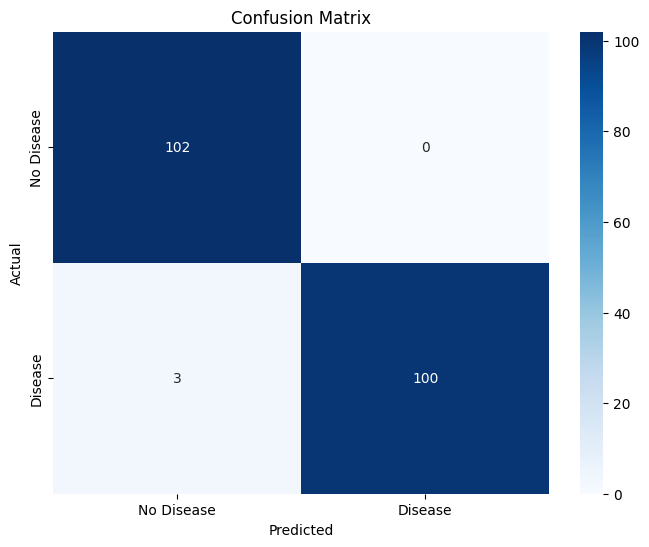


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned and preprocessed dataset
df = pd.read_csv("D:\\Data Science Projects\\HealthcareDataAnalytics\\Dataset\\heart.csv")

# Define target and features
target_column = 'target'  # Replace with your actual target column name
X = df.drop(target_column, axis=1)
y = df[target_column]

# Feature Engineering
# Encode categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  # You can use other classifiers as well
])

# Cross-Validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Hyperparameter Tuning using Grid Search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("\nBest Parameters:")
print(grid_search.best_params_)

print("\nBest Score from Grid Search:")
print(grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

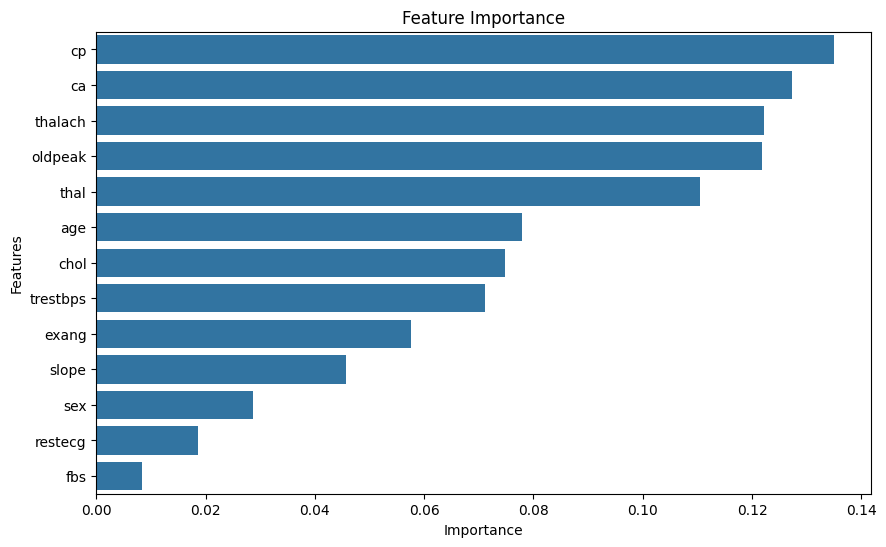

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the cleaned and preprocessed dataset
df = pd.read_csv("D:\\Data Science Projects\\HealthcareDataAnalytics\\Dataset\\heart.csv")

# Define target and features
target_column = 'target'  # Replace with your actual target column name
X = df.drop(target_column, axis=1)
y = df[target_column]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [9]:
import os

# Define the output directory path
output_dir = 'D:\\Data Science Projects\\HealthcareDataAnalytics\\Output'

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [10]:
# Save feature importances to the newly created directory
feature_importances.to_csv('D:\\Data Science Projects\\HealthcareDataAnalytics\\Output\\feature_importances.csv')